ПРАКТИЧНА РОБОТА 5

виконав Бабич Антон, міт31

In [8]:
import tensorflow as tf

scalar = tf.constant(10)
print('\nscalar:')
print(scalar)

var_tensor = tf.Variable([[1.0, 2.0], [3.0, 4.0]])
print("\nVariable Tensor:")
print(var_tensor)

const_tensor = tf.constant([[1.0, 2.0], [3.0, 4.0]])
print("\nConstant Tensor:")
print(const_tensor)

sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])
print("\nSparse Tensor:")
print(sparse_tensor)

tensor_sum = tf.add(const_tensor, var_tensor)
print("\nSum of constant and variable tensor:")
print(tensor_sum)

tensor_product = tf.multiply(const_tensor, var_tensor)
print("\nProduct of constant and variable tensor:")
print(tensor_product)




scalar:
tf.Tensor(10, shape=(), dtype=int32)

Variable Tensor:
<tf.Variable 'Variable:0' shape=(2, 2) dtype=float32, numpy=
array([[1., 2.],
       [3., 4.]], dtype=float32)>

Constant Tensor:
tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)

Sparse Tensor:
SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

Sum of constant and variable tensor:
tf.Tensor(
[[2. 4.]
 [6. 8.]], shape=(2, 2), dtype=float32)

Product of constant and variable tensor:
tf.Tensor(
[[ 1.  4.]
 [ 9. 16.]], shape=(2, 2), dtype=float32)


2. Побудова моделі для регресії:

використайте згенерований у лабораторній роботі 2 набір даних для задачі регресії, включаючи ознаки та відповідні значення цільової змінної.

Створіть та скомпілюйте модель нейронної мережі для регресії з використанням TensorFlow.

Виберіть функцію втрати та оптимізатор для моделі та навчіть її на підготовленому наборі даних.

Оцініть результати навчання та відобразіть їх графічно.

Порівняйте з результатами, отриманими у лабораторній роботі 2.

7/7 [==============================] - 0s 2ms/step - loss: 91.8566
Помилка на тестовому наборі даних: 91.86
7/7 [==============================] - 0s 2ms/step
Коефіцієнт детермінації (R-squared): 0.97817


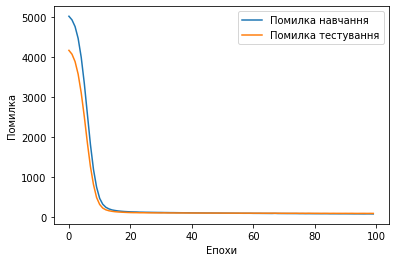

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, noise=10, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)

loss = model.evaluate(X_test, y_test)
print(f'Помилка на тестовому наборі даних: {loss:.2f}')

y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print(f'Коефіцієнт детермінації (R-squared): {r_squared:.5f}')

plt.plot(history.history['loss'], label='Помилка навчання')
plt.plot(history.history['val_loss'], label='Помилка тестування')
plt.xlabel('Епохи')
plt.ylabel('Помилка')
plt.legend()
plt.show()


Коефіцієнт детермінації моделі в лаб3 (0.98148) є більшим ніж в цій (0.97817).

7/7 [==============================] - 0s 2ms/step
Neural Network Metrics:
Precision: 0.93
Recall: 0.92
F1-Score: 0.93
ROC AUC: 0.98
Confusion Matrix:
[[91  7]
 [ 8 94]]
7/7 [==============================] - 0s 1ms/step


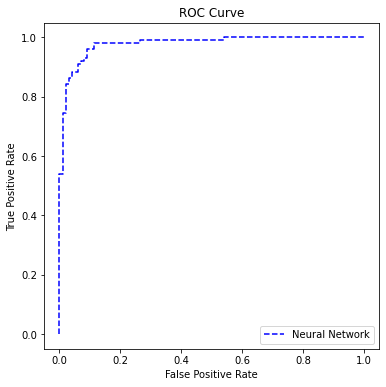

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_classes=2, random_state=4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(2,)),  # Input layer with 2 features
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)

precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)
roc_auc = roc_auc_score(y_test, model.predict(X_test))

cm = confusion_matrix(y_test, y_pred_nn)

print("Neural Network Metrics:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

print("Confusion Matrix:")
print(cm)

from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, linestyle='--', color='blue', label='Neural Network')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


в 3 лаб роботі (Logistic Regression Model):
Precision: 0.91
Recall: 0.92
F1-mean: 0.92
AUC-ROC: 0.91

в цій (nn regression):
Precision: 0.93
Recall: 0.92
F1-Score: 0.93
ROC AUC: 0.98